# Решение краевой задачи для линейного дифференциального уравнения второго порядка методом прогнки 

Задано уравнение и краевые условие 

<center> ${y''+p(x)y'+q(x)y=f(x)}$</center>
<center> ${c_1y(a)+c_2y'(a)=c}$ ${d_1y(b)+d_2y'(b)=d}$</center>

Для него мы находим:

<center>${\beta_0=c_1h-c_2}$, ${\gamma_0=c_2}$, ${\varphi_0=hc}$</center>
<center>${\varphi_i=f_i*h^2}$, ${\alpha_i = 1 - \frac{1}{2}p_ih_i}$, ${\beta_i=d_ih^2-2}$, ${\gamma_i=1+\frac{1}{2}p_ih}$, ${i=1,...,n-1}$</center>
<center>${\alpha_n=-d_2}$, ${\beta_n=hq_1+d_2}$, ${\varphi_n=hd}$</center>

Решение ищем в виде

<center>${y_i=u_i+v_iy_{i+1}}$</center>

Где

<center>${v_i=-\frac{\gamma_i}{\beta_i+\alpha_iv_{i-1}}}$, ${u_i = \frac{\varphi_i-\alpha_iu_{i-1}}{\beta_i+\alpha_iv_i}}$</center>

In [2]:
def p(x):
    return -(x - 1) * (x - 2)

In [3]:
def q(x):
    return np.cos(x)

In [4]:
def f(x):
    return np.cos(x) ** 2

In [5]:
def prog(p, q, f, a, b, c1, c2, c, d1, d2, d, n):
    h = (b - a) / n
    u = np.zeros(n + 1)
    v = np.zeros(n + 1)
    x = np.zeros(n + 1)
    y = np.zeros(n + 1)
    alp = np.zeros(n + 1)
    bet = np.zeros(n + 1)
    gam = np.zeros(n + 1)
    phi = np.zeros(n + 1)
    
    x[0] = a
    i = 1
    u[0] = c * h / (c1 * h - c2)
    v[0] = -c2 / (c1 * h - c2)
    
    while True:
        x[i] = x[i - 1] + h
        alp[i] = 1 - p(x[i]) * h / 2
        bet[i] = h ** 2 * q(x[i]) - 2
        gam[i] = 1 + p(x[i]) * h / 2
        phi[i] = (h ** 2) * f(x[i])
        v[i] = -gam[i] / (bet[i] + alp[i] * v[i-1])
        u[i] = (phi[i] - alp[i] * u[i-1]) / (bet[i] + alp[i]*v[i])
        if i == n-1:
            break
        i += 1
    x[n] = b
    alp[n] = -d2
    bet[n] = h * d1 + d2
    phi[n] = h * d
    v[n] = 0
    u[n] = (phi[n] - alp[n] * u[n-1]) / bet[n]
    y[n] = u[n]
    i = n - 1
    while True:
        y[i] = u[i] + y[i+1]*v[i]
        if i == 0:
            break
        i -= 1
    return {'x': x, 'y': y}

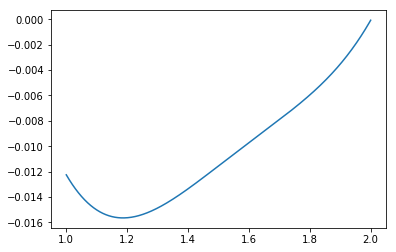

In [6]:
a = 1
b = 2
c1 = -1
c2 = 0.3
c = 0
d1 = 0.17
d2 = 0.19
d = 0
n = 500


ans = prog(p, q, f, a, b, c1, c2, c, d1, d2, d, n)
plt.plot(ans['x'], ans['y'])
plt.show()

# Решение нелинейной системы методом простых итераций 

Ну это методо простых итераций, работает так же как и все другие методы простых итераций 

In [7]:
def F(x):
    return np.array([np.sin(x[1] + 1) - 1.2, 1 - np.cos(x[0]) / 2])

In [8]:
def simple_iter(F, x0, eps=1e-6):
    k = 0
    while True:
        x = F(x0)
        if (np.linalg.norm(x - x0) < eps):
            return x0, k
        x0 = x
        k += 1

In [9]:
x0 = np.array([0, 0])
ans = simple_iter(F, x0)
ans[1]

6

In [10]:
x = ans[0]
[np.sin(x[1] + 1) - x[0] - 1.2, 2 * x[1] + np.cos(x[0]) - 2]

[6.434182142633915e-08, 1.305532745909943e-06]

# Решение систем линейных уравнений методом квадратных корней 

Во время прямого хода находят элементы g:

<center>${g_{11} = \sqrt{a_{11}}}$ ${g_{12} = \frac{a_{11}}{g_{11}}}$ ${g_{13} = \frac{a_{13}}{g_{11}}}$</center>

<center> ${g_{22} = \sqrt{a_{22}-g_{12}^2}}$ ${g_{23} = \frac{a_{23} - g_{12}g_{13}}{g_{23}}}$</center>

<center> ${g_{23} = \sqrt{a_{33} - g_{13}^2 - g_{23}^2}}$ </center>

Затем находим y:

<center> ${y_1 = \frac{b_1}{g_{11}}}$ ${y_2 = \frac{b_2-g_{12}y_1}{g_{22}}}$ ${y_3 = \frac{b_3-g_{13}y_1-g_{23}y_2}{g_{33}}}$</center>

В конце находим x:

<center> ${x_3=\frac{y_3}{g_{33}}}$ ${x_2 = \frac{y_2-g_{23}x_3}{g_{22}}}$ ${x_1 = \frac{y_1-g_{12}x_2-g_{13}x_3}{g_{11}}}$</center>

In [35]:
A = np.array([[2.47, 0.65, -1.88], [1.34, 1.17, 2.54], [0.86, -1.73, -1.08]])
b = np.array([1.24, 2.35, 3.15])
G = np.array([[0.0, 0.0, 0.0],[0.0, 0.0, 0.0],[0.0, 0.0, 0.0]])
S = np.array([0, 0, 0])
Ss = np.array([0, 0, 0])
x = np.array([0, 0, 0])
y = np.array([0, 0, 0])

In [36]:
G[0][0] = math.sqrt(abs(A[0][0]))
G[0][1] = A[0][1] / G[0][0]
G[0][2] = A[0][2] / G[0][0]
G[1][1] = math.sqrt(abs(A[1][1] - G[0][1] ** 2))
G[1][2] = (A[1][2] - G[0][1] * G[0][2]) / G[1][1]
G[2][2] = math.sqrt(abs(A[2][2] - G[0][2] ** 2 - G[1][2] ** 2))
y[0] = b[0] / G[0][0]
y[1] = (b[1] - G[0][1] * y[0]) / G[1][1]
y[2] = (b[2] - G[0][2] * y[0] - G[1][2] * y[1]) / G[2][2]
x[2] = y[2] / G[2][2]
x[1] = (y[1] - G[1][2] * x[2]) / G[1][1]
x[0] = (y[0] - G[0][1] * x[1] - G[0][2] * x[2]) / G[0][0]
ans = x

In [32]:
ans

array([2.55172414e+00, 1.64864865e+00, 1.80713722e-16])

# Решение системы линейных уравнений методом главных элементов 

На каждом этапе исключения неизвестного выбирают главный элемент. Наибольший по
модулю коэффициент при неизвестных, затем находят значения ${m_i}$, равные частному от
деления элементов столбца, содержащих главный элемент, на главный элемент, взятый с
противоположным знаком.
Для получения элементов следующего этапа прибавляют главную строку (строку,
содержащую главный элемент) к остальным строкам, умножая её на соответствующее
значение ${m}$

In [23]:
A1 = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
A = [[0.62, -0.44, -0.86], [0.83, 0.42, -0.56], [0.58, -0.37, -0.62]]
x = [0, 0, 0]
b = [0.68, 1.24, 0.87]
b1 = [0.68, 1.24, 0.87]

In [28]:
for i in range(3):
    z = max(A[i][0], A[i][1], A[i][2])
    A[i][0] = A[i][0] / z
    A[i][1] = A[i][1] / z
    A[i][2] = A[i][2] / z
    b[i] = b[i] /z
i = 0
for k in range(3):
    for i in range(k + 1):
        j = k
        for j in range(3):
            A1[i][j] = A[i][j] - A[k][j] * A[i][k] / A[k][k]
            b1[i] = b[i] - b[k] * A[i][k] / A[k][k]
    i = k + 1
    for i in range(2):
        j = k
        for j in range(2):
            A[i][j] = A1[i][j]
            b[i] = b1[i]
for i in reversed(range(3)):
    S = 0
    for j in reversed(range(3)):
        S = S + x[j] * A[i][j]
    x[i] = (b[i] - S) / A[i][i]
ans = x

In [30]:
ans

array([2.55172414e+00, 1.64864865e+00, 1.80713722e-16])